# 6. Dynamic Graphs and Network Evolution Analysis

In this session we study **dynamic (temporal) graphs** and methods to analyze how network structure evolves over time. We cover formal definitions, common representations, mathematical measures for temporal networks, basic models of evolution, and methods for **anomaly / change detection** in time-varying graphs. A small hands-on Python example (snapshot-based) is included at the end.

---

## 6.1 Definitions and Representations

### 6.1.1 Temporal / Dynamic Graph — formal definition

A **temporal graph** (also: time-varying graph) is a graph whose vertex set and/or edge set can change over (continuous or discrete) time.

Two common formalizations:

**(A) Discrete-time snapshot sequence**

A temporal graph is represented as a sequence of static graphs (snapshots)
$$
\mathcal{G} = \{ G^{(1)}, G^{(2)}, \dots, G^{(T)} \},
$$
where each snapshot $G^{(t)}=(V^{(t)},E^{(t)})$ is the graph observed during time interval $t$ (e.g. day $t$). Snapshots can be overlapping or non-overlapping windows.

**(B) Temporal edge list (time-stamped edges / continuous time)**

A temporal graph is given by a set of time-stamped interactions
$$
\mathcal{E} = \{ (u,v,t) : \text{an interaction (or edge) between } u\text{ and } v \text{ at time } t \}.
$$
Optionally edges have durations $(u,v,t_{start},t_{end})$.

---

### 6.1.2 Snapshot vs. Streaming vs. Interval representations

1. **Snapshot-based**  
   - **Description:** Temporal graph is a sequence of static graphs (snapshots), each covering a fixed time window.  
   - **Use case:** Batch analysis of network statistics over time.  
   - **Example:** Daily social interactions:
     - `G1` = Monday interactions
     - `G2` = Tuesday interactions
     - `G3` = Wednesday interactions
   - Each snapshot can be analyzed independently (degree, clustering, communities).

2. **Streaming / Event-based**  
   - **Description:** Edges arrive continuously; the graph is updated online.  
   - **Use case:** Real-time monitoring or anomaly detection.  
   - **Example:** Chat messages as edges `(sender, receiver, timestamp)` processed as they arrive.

3. **Interval / Temporal edges**  
   - **Description:** Edges have a lifetime `[t_start, t_end]`; temporal paths respect these intervals.  
   - **Use case:** Relationships that persist for a period of time.  
   - **Example:** Phone calls or collaborations:
     - `(A, B, [10:05, 10:15])` — a call from A to B
     - Active collaborations between researchers

**Summary Table:**

| Representation | Data Type | Time Handling | Example |
|----------------|-----------|---------------|---------|
| Snapshot-based  | Static graphs per window | Batch | Daily social interactions |
| Streaming       | Time-stamped edges        | Online / real-time | Chat messages, network packets |
| Interval        | Edges with start & end times | Continuous or discrete | Phone calls, collaborations |

---

## 6.2 Temporal analogues of static measures

Many classic graph measures generalize to the temporal setting. Let $G^{(t)}=(V^{(t)},E^{(t)})$ be the snapshot at time $t$.

### 6.2.1 Temporal degree (per node)

Node $v$ degree at time $t$:
$$
d_v^{(t)} = \deg_{G^{(t)}}(v) = |\{u : (v,u)\in E^{(t)}\}|.
$$

Cumulative / aggregated degree over interval $[t_1,t_2]$:
$$
\bar d_v(t_1,t_2)=\sum_{t=t_1}^{t_2} d_v^{(t)} \quad\text{or}\quad \frac{1}{t_2-t_1+1}\sum_{t=t_1}^{t_2} d_v^{(t)}.
$$

### 6.2.2 Temporal closeness / reachability and temporal paths

A **temporal path** is a sequence of time-ordered edges $(v_0,v_1,t_1), (v_1,v_2,t_2),\dots$ with $t_1 \le t_2 \le \dots$ (strict inequality if edges are instantaneous and must respect causality). Temporal reachability and temporal distances depend on time ordering.

### 6.2.3 Temporal motifs

Small time-respecting patterns (e.g., A→B at $t$, B→C at $t+\delta$) called **temporal motifs**. Counting their frequency reveals micro-dynamics.

---

## 6.3 Dynamic network models (brief)

- **Edge arrival models**: Random edge insertion processes (Poisson processes, temporal ER).  
- **Temporal preferential attachment**: time-aware Barabási–Albert variants (node/edge arrival times matter).  
- **Activity-driven models** (Perra et al.): each node $i$ has activity $a_i$ (probability to create edges per unit time).

These models provide baselines to compare real evolution and detect anomalies.

---

## 6.4 Tasks in dynamic graph analysis

1. **Change-point detection** — detect times $t$ where global network behavior changes.  
2. **Anomaly detection** — find nodes/edges/subgraphs whose behaviour is unusual (sudden degree spike, abnormal motif frequency).  
3. **Dynamic community detection** — track evolving communities (incremental clustering, community birth/death).  
4. **Temporal link prediction** — predict future edges given past snapshots / events.  
5. **Dynamic embeddings** — learn time-aware node representations (DynGEM, DynamicTriad, TGN).

---

## 6.5 Methods for anomaly & change detection (core ideas)

### 6.5.1 Global change detection (snapshot-level)

Define a global statistic $S^{(t)}$ (e.g., number of edges, modularity, spectral gap, average clustering). Declare a change at time $t$ if $S^{(t)}$ deviates significantly from baseline.

Example statistics:
- Edge count: $m^{(t)}=|E^{(t)}|$.
- Modularity of a fixed partition: $Q^{(t)}$.
- Leading eigenvalue of adjacency / Laplacian.

Detection can use:
- **Control charts / z-score**: $z^{(t)} = (S^{(t)}-\mu)/\sigma$ over window.  
- **CUSUM** or **Page-Hinkley** methods for sequential detection.  
- **Scan statistics**: sliding window maximum deviations.

### 6.5.2 Local / node-level anomaly

Detect node $v$ that exhibits an unusual change in a local measure (degree, ego-density, motif count).

Formally, compute time series $x_v^{(t)}$ (e.g., degree). Flag $v$ at time $t$ if
$$
|x_v^{(t)} - \mu_v^{(t-w,t-1)}| > \tau \cdot \sigma_v^{(t-w,t-1)}
$$
where $\mu_v,\sigma_v$ are mean/std over a past window of size $w$ and $\tau$ is a threshold.

### 6.5.3 Subgraph / structural anomaly

Look for subgraphs whose frequency (or embedding) changes abruptly. Use subgraph counts or compare learned embeddings across time and flag large distances.

### 6.5.4 Embedding-based detection

- Learn node embeddings $\mathbf{z}_v^{(t)}$ per snapshot or incrementally.  
- Compute embedding drift: $\Delta_v^{(t)} = \|\mathbf{z}_v^{(t)} - \mathbf{z}_v^{(t-1)}\|$.  
- High drift indicates potential anomaly.

---

## 6.6 Algorithms & approaches (short survey)

- **Snapshot statistics + control charts** — very simple, interpretable.  
- **Spectral change detection** — monitor eigenvalues/eigenvectors of adjacency / Laplacian.  
- **Matrix / tensor decomposition over time** (e.g., dynamic SVD, PARAFAC) — detect change in low-rank factors.  
- **Dynamic community algorithms**: incremental Louvain / Label Propagation with temporal smoothing (regularize partitions across time).  
- **Temporal motif counting** — compare counts to baseline (randomized temporal null models).  
- **Graph neural networks for anomaly detection**: learn temporal GNNs (TGN, DynGEM) and detect outliers in embedding space.

---

## 6.7 Practical example: snapshot-based anomaly detection (Python)

**Goal:** generate a sequence of snapshots, compute node degrees, detect nodes with sudden degree spike using rolling z-score.

This example uses standard libraries (`networkx`, `numpy`, `matplotlib`).



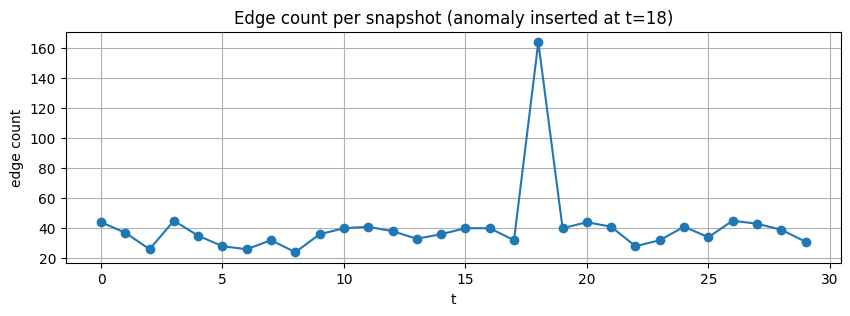

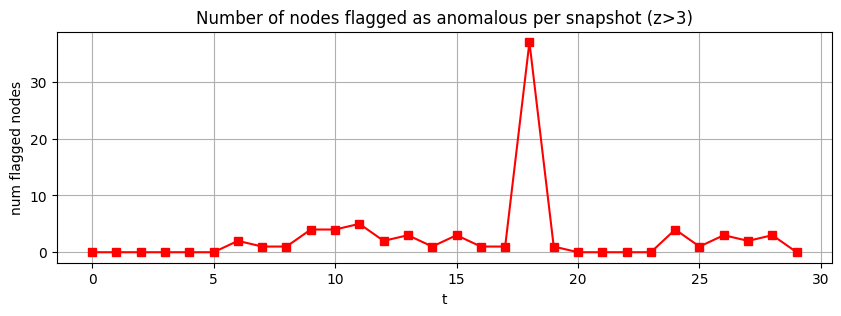

Node 0 flagged at times: [(18, np.int64(5), np.float64(1.2), np.float64(0.7483314773547883), np.float64(5.077963596336063)), (24, np.int64(3), np.float64(1.4), np.float64(0.4898979485566356), np.float64(3.2659863237109046))]
Node 1 flagged at times: [(13, np.int64(3), np.float64(1.0), np.float64(0.6324555320336759), np.float64(3.162277660168379)), (18, np.int64(9), np.float64(2.2), np.float64(0.7483314773547882), np.float64(9.08688222502243))]
Node 2 flagged at times: [(7, np.int64(3), np.float64(0.8), np.float64(0.4), np.float64(5.5)), (14, np.int64(3), np.float64(1.0), np.float64(0.6324555320336759), np.float64(3.162277660168379)), (18, np.int64(5), np.float64(1.2), np.float64(1.1661903789690602), np.float64(3.2584731177076676))]
Node 3 flagged at times: [(18, np.int64(8), np.float64(1.0), np.float64(0.6324555320336759), np.float64(11.067971810589327))]
Node 4 flagged at times: [(18, np.int64(4), np.float64(1.2), np.float64(0.7483314773547883), np.float64(3.741657386773941))]
Node 5 

In [2]:
# Example: snapshot-based anomaly detection by degree z-score
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def make_snapshot(num_nodes, p_edge):
    """Erdos-Renyi snapshot with num_nodes and edge prob p_edge"""
    return nx.erdos_renyi_graph(num_nodes, p_edge)

# Generate T snapshots; introduce an anomaly at t = anomaly_t
T = 30
num_nodes = 50
snapshots = []
for t in range(T):
    if t == 18:
        # anomaly: suddenly more edges (increase p)
        G = make_snapshot(num_nodes, p_edge=0.15)
    else:
        G = make_snapshot(num_nodes, p_edge=0.03)
    snapshots.append(G)

# Compute degree time series for each node
degree_ts = defaultdict(list)
for t, G in enumerate(snapshots):
    for v in range(num_nodes):
        degree_ts[v].append(G.degree(v))

# Detect anomalies with rolling z-score (window w)
w = 5
tau = 3.0  # threshold: z > tau considered anomaly
anomalies = defaultdict(list)  # node -> list of times flagged

for v in range(num_nodes):
    x = np.array(degree_ts[v])
    for t in range(w, T):
        window = x[t-w:t]
        mu = window.mean()
        sigma = window.std(ddof=0) if window.std(ddof=0) > 0 else 1.0
        z = (x[t] - mu) / sigma
        if z > tau:
            anomalies[v].append((t, x[t], mu, sigma, z))

# Summarize anomalies: how many nodes flagged at each time
time_flags = np.zeros(T, dtype=int)
for v, lst in anomalies.items():
    for (t, *_ ) in lst:
        time_flags[t] += 1

plt.figure(figsize=(10,3))
plt.plot(range(T), [G.number_of_edges() for G in snapshots], marker='o')
plt.title("Edge count per snapshot (anomaly inserted at t=18)")
plt.xlabel("t")
plt.ylabel("edge count")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(range(T), time_flags, marker='s', color='red')
plt.title("Number of nodes flagged as anomalous per snapshot (z>3)")
plt.xlabel("t")
plt.ylabel("num flagged nodes")
plt.grid(True)
plt.show()

# Print a few example flagged nodes
for v, lst in list(anomalies.items())[:10]:
    print(f"Node {v} flagged at times: {lst}")